In [36]:
from pyforest import *
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
def true_polynomial_func(x):
    
    return 5*x*x*x + 3*x*x + 2*x + 12

In [4]:
np.random.seed(0)

n_samples = 30
degree = 3

X = np.sort(np.random.rand(n_samples))
x = X.reshape(-1, 1)

y = true_polynomial_func(X) + np.random.randn(n_samples) * 0.1

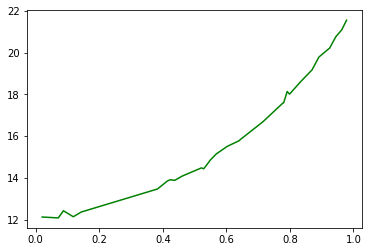

In [6]:
plt.plot(x, y, color = 'green', label = 'y')

In [7]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=True)

In [8]:
model = LinearRegression().fit(x,y)
model.score(x,y)

0.9102677484816454

In [10]:
linear_regression = LinearRegression()
pipeline = Pipeline([
    ('polynomial_features', polynomial_features),
    ('linear_regression', linear_regression)
])

In [11]:
pipeline.fit(x,y)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [12]:
pipeline.score(x,y)

0.9986155950154447

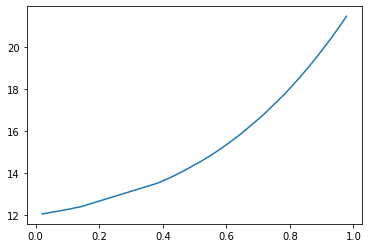

In [13]:
plt.plot(x, pipeline.predict(x))

#### Power transformer

In [20]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)
data = pd.concat([X, Y], axis=1)

In [22]:
data.columns = ['X', 'Y']

In [24]:
data.head()

,X,Y
0,0.020218,12.128148
1,0.071036,12.084786
2,0.087129,12.427316
3,0.118274,12.141351
4,0.143353,12.367663


(array([3., 2., 0., 1., 4., 5., 3., 3., 4., 5.]),
 array([0.0202184 , 0.11605839, 0.21189839, 0.30773838, 0.40357838,
        0.49941837, 0.59525836, 0.69109836, 0.78693835, 0.88277835,
        0.97861834]),
 <a list of 10 Patch objects>)

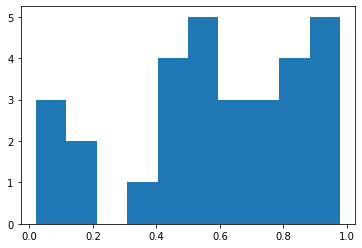

In [28]:
plt.hist(data['X'], bins = 10)

In [31]:
power_transformer = PowerTransformer(method='box-cox')
x_transformed = power_transformer.fit_transform(X)

(array([4., 1., 0., 2., 3., 6., 2., 4., 3., 5.]),
 array([-1.95697373, -1.61696754, -1.27696135, -0.93695515, -0.59694896,
        -0.25694277,  0.08306342,  0.42306962,  0.76307581,  1.103082  ,
         1.44308819]),
 <a list of 10 Patch objects>)

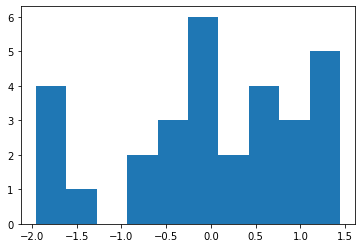

In [33]:
plt.hist(pd.DataFrame(x_transformed)[0])

In [38]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
x_transformed = quantile_transformer.fit_transform(X)

/home/ghaff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


(array([ 1.,  0.,  0.,  4., 10., 10.,  4.,  0.,  0.,  1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

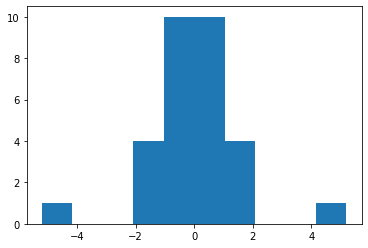

In [39]:
plt.hist(pd.DataFrame(x_transformed)[0])

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1.

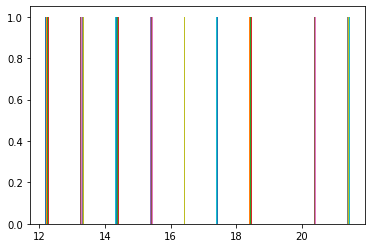

In [41]:
plt.hist(pd.DataFrame(Y))

In [42]:
y_transformed = quantile_transformer.fit_transform(Y)

/home/ghaff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


(array([ 1.,  0.,  0.,  4., 10., 10.,  4.,  0.,  0.,  1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

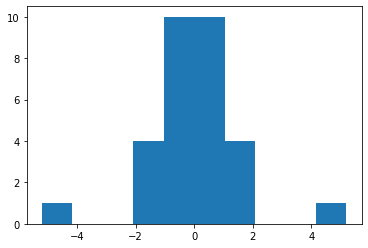

In [43]:
plt.hist(pd.DataFrame(y_transformed)[0])